### 1.TensorBoardX简介
对于TensorFlow开发者，TensorBoard是较为熟悉的一套可视化工具，提供了数据曲线、计算图等数据的可视化功能。TensorBoard作为独立于TensorFlow的一个工具，可以将按固定格式保存的数据可视化。在PyTorch中，也可以使用Tensorboard_logger进行可视化，但其功能较少。Tensor-BoardX是专为PyTorch开发的一套数据可视化工具，功能与TensorBoard相当，支持曲线、图片、文本和计算图等不同形式的可视化，而且使用简单。下面以实现损失曲线的可视化为例，介绍TensorBoardX的使用方法。

In [1]:
#在训练脚本中，添加如下几句指令，即可创建记录对象与数据的添加
from tensorboardX import SummaryWriter

#创建writer对象
writer = SummaryWriter('logs/tmp')

#添加曲线，并且可以使用'/'进行多级标题党指定
writer.add_scalar('loss/total_loss', loss.data[0], total_iter)
writer.add_scalar('loss/rpn_loss', rpn_loss.data[0], total_iter)

#添加TensorBoardX指令后，则将在logs/tmp文件夹下生成events开头的记录文件，然后使用TensorBoard在终端中开启Web服务
tensorboard --logdir=logs/tmp/
TensorBoard 2.4.1 at http://pytorch:6006 (Press CTRL+C to quit)
        
#在浏览器端输入上述网址http://pytorch:6006，即可看到数据的可视化效果

SyntaxError: cannot assign to operator (Temp/ipykernel_9688/1721740427.py, line 12)

### 2.Visdom简介
Visdom由Facebook团队开发，是一个非常灵活的可视化工具，可用于多种数据的创建、组织和共享，支持NumPy、Torch与PyTorch数据，目的是促进远程数据的可视化，支持科学实验。

**使用Visdom前需要在Anaconda Prompt打开监听窗口！**

In [4]:
#下面实现一个文本、曲线及图片的可视化示例
import torch
import visdom

#创建visdom客户端，使用默认端口8097，环境为first，环境的作用是对可视化的空间进行分区
vis = visdom.Visdom(env='first')

#vis对象有text()、line()和image()函数，其中的win参数代表了显示的窗格（pane）的名字
vis.text('first visdom', win='text1')

#在此使用append为真来进行增加text，否则会覆盖之前的text
vis.text('hello PyTorch', win='text1', append=True)

#绘制y=-i^2+20×i+1的曲线，opts可以进行标题、坐标轴标签等的配置
for i in range(20):
    vis.line(X=torch.FloatTensor([i]), Y=torch.FloatTensor([-i**2+20*i+1]),
          opts={'title': 'y=-x^2+20x+1'}, win='loss', update='append'
            )

#可视化一张随机照片
vis.image(torch.randn(3, 256, 256), win='random_image')

#打开浏览器，输入http://localhost:8097，即可看到可视化的结果

Setting up a new session...


'random_image'

[WinError 10054] 远程主机强迫关闭了一个现有的连接。
[WinError 10054] 远程主机强迫关闭了一个现有的连接。
on_close() takes 1 positional argument but 3 were given
on_close() takes 1 positional argument but 3 were given
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
on_close() takes 1 positional argument but 3 were given
on_close() takes 1 positional argument but 3 were given
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
on_close() takes 1 positional argument but 3 were given
on_close() takes 1 positional argument but 3 were given
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
on_close() takes 1 positional argument but 3 were given
on_close() takes 1 positional argument but 3 were given
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
on_close() takes 1 positional argument but 3 were given
on_close() takes 1 positional argument but 3 were given
[WinError 10061] 由于目标计算机积极拒绝，无法连接。
on_close() takes 1 positional argument but 3 were given

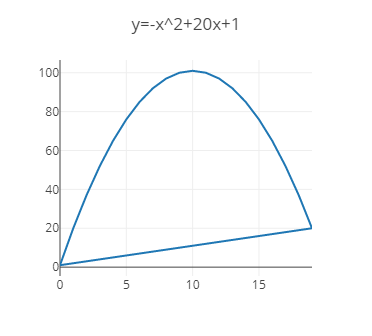

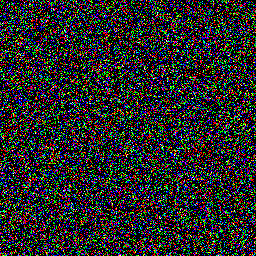